In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

#サンプルデータの読み込み
df_titanic = sns.load_dataset("titanic")

#項目名の日本語化
columns_t = ['生存', '等室', '性別', '年齢', '兄弟配偶者数',
             '両親子供数', '料金', '乗船港コード', '等室名',
             '男女子供', '成人男性', 'デッキ', '乗船港', '生存可否', '独身']
df_titanic.columns = columns_t

#データの内容
display(df_titanic.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,等室名,男女子供,成人男性,デッキ,乗船港,生存可否,独身
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
#欠損値の数を調べる
print(df_titanic.isnull().sum())

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
等室名         0
男女子供        0
成人男性        0
デッキ       688
乗船港         2
生存可否        0
独身          0
dtype: int64


In [3]:
#項目「乗船港」の項目値ごとの個数
print(df_titanic['乗船港'].value_counts())
print()

#項目「生存可否」の項目値ごとの個数
print(df_titanic['生存可否'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: 乗船港, dtype: int64

no     549
yes    342
Name: 生存可否, dtype: int64


In [4]:
#数値のデータ項目に対して統計情報の調査
display(df_titanic.describe())

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#集約関数を利用して「性別」ごとの年齢平均を計算
display(df_titanic.groupby('性別').mean())

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金,成人男性,独身
性別,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


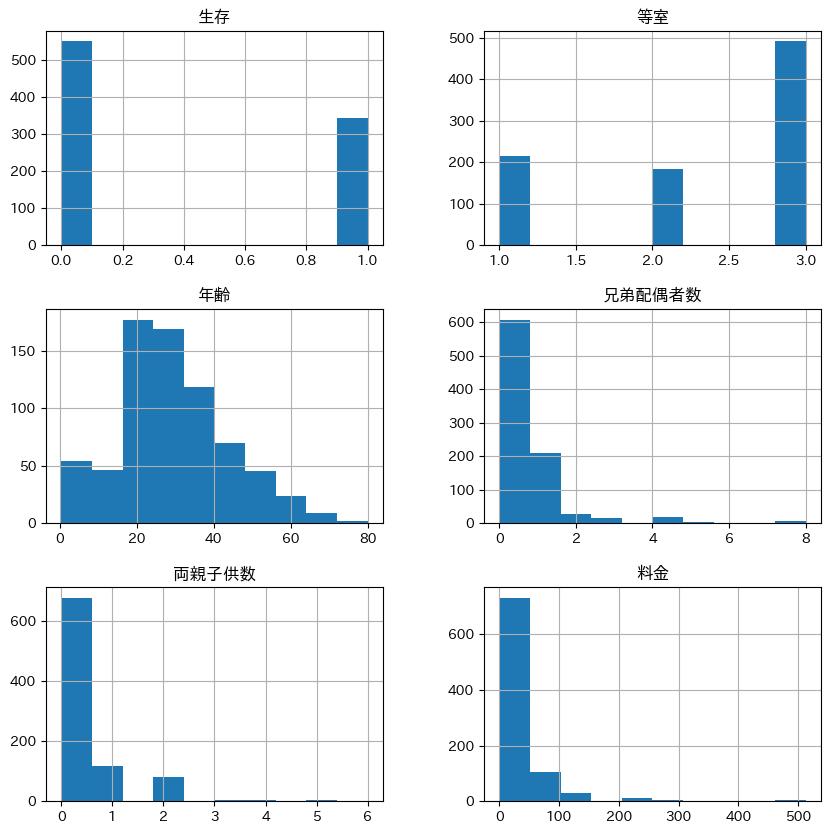

In [6]:
#分析対象項目のグラフ表示(数値項目の場合)

#数値項目の定義
columns_n = ['生存', '等室', '年齢', '兄弟配偶者数', '両親子供数', '料金']

#グラフ描画領域の調整
plt.rcParams['figure.figsize'] = (10, 10)

#データフレームの数値項目でヒストグラム表示
df_titanic[columns_n].hist()
plt.show()

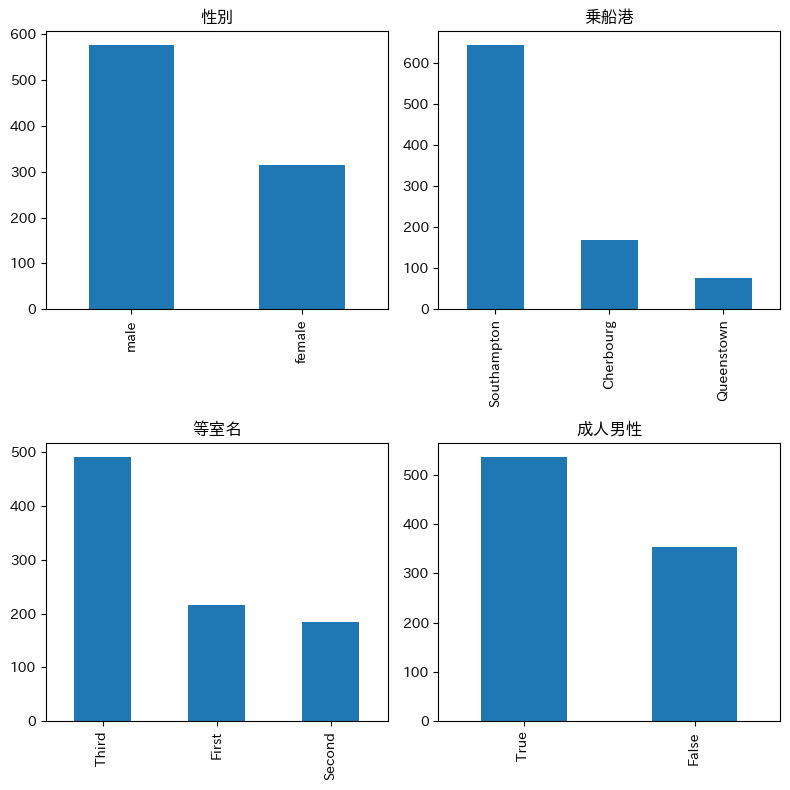

In [7]:
#分析対象項目のグラフ表示(非数値項目の場合)

#グラフ化対象列の定義
columns_c = ['性別', '乗船港', '等室名', '成人男性']

#グラフ描画領域の調整
plt.rcParams['figure.figsize'] = (8, 8)

#ループ処理で。ヒストグラム表示
for i, name in enumerate(columns_c):
    ax = plt.subplot(2, 2, i+1)
    df_titanic[name].value_counts().plot(kind='bar', title=name, ax=ax)
    
#レイアウトの調整
plt.tight_layout()
plt.show()